NOTE: 29 - 31 Mart ve 2 Nisan Dersleri Ramazan Bayramı dolayısıyla iptal edilmiştir.

Decision Tree
- Kök Düğüm (Root Node)  --> Tüm veri burada
- İç Düğümler (Internal Node) --> Veriye göre karar verilen düğümler
- Yaprak Düğümler (Leaf Node) --> Nihai Kararlar

Random Forest (Rastgele Orman)

- overfitting DT'ye göre düşüktür.

  
1. Make data ready
2. Train more than one trees
3. Prediction

In [11]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

import matplotlib.pyplot as plt

In [12]:
np.random.seed(42)

### Data oluşturma :

In [13]:
n_samples = 2000
area = np.random.randint(50, 250, n_samples)
rooms = np.random.randint(1,6, n_samples)
age = np.random.randint(0,50, n_samples)
location_score = np.random.uniform(0,10, n_samples) # uniform ondalık sayı üretmesi için

In [14]:
#noise
noise = np.random.normal(0,20000, n_samples)
price = (area * 3000) + (rooms * 50000) - (age*1000) + (location_score*10000) + noise

In [15]:
df = pd.DataFrame({"area": area,
                  "rooms": rooms,
                  "age": age,
                  "location_score": location_score,
                  "price": price})

In [16]:
X = df[["area", "rooms", "age", "location_score"]]
y = df["price"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

In [18]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [21]:
model.fit(X_train, y_train)
y_prediction = model.predict(X_test)

In [22]:
print(df)

      area  rooms  age  location_score          price
0      152      2    0        6.071353  615196.099075
1      229      2   16        3.887263  776179.283243
2      142      2   21        2.402991  532848.242828
3       64      2   33        0.949653  267769.915362
4      156      2   44        3.149184  558430.550427
...    ...    ...  ...             ...            ...
1995   207      3    5        8.360789  867578.124171
1996   210      3   24        1.547860  754961.948020
1997   126      1   30        3.011756  465045.477112
1998   165      1   21        2.489769  587564.884870
1999   203      5    1        3.723071  900365.725831

[2000 rows x 5 columns]


In [23]:
rmse = np.sqrt(mean_squared_error(y_test, y_prediction))
print("RMSE - Root Mean Squared Error: ", rmse)

RMSE - Root Mean Squared Error:  26284.689457796507


Yeni data ile : 

In [24]:
model = RandomForestRegressor(n_estimators=120, random_state=42)
model.fit(X_train, y_train)
y_prediction = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_prediction))
print("RMSE - Root Mean Squared Error: ", rmse)

RMSE - Root Mean Squared Error:  26279.000977881373


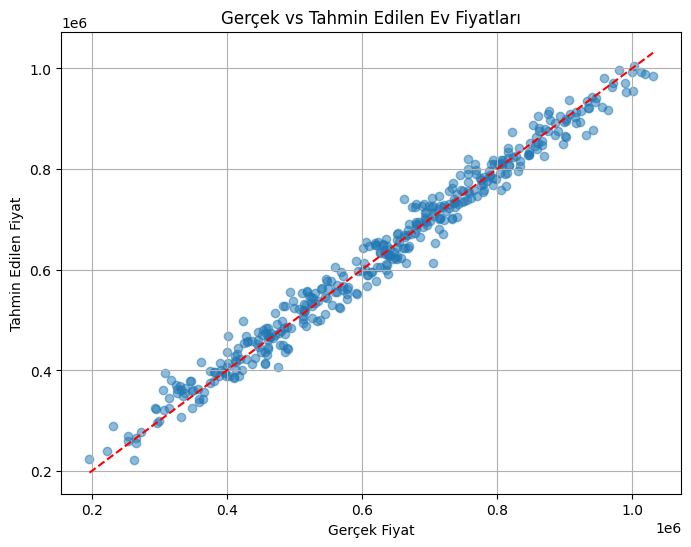

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_prediction, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Gerçek Fiyat')
plt.ylabel('Tahmin Edilen Fiyat')
plt.title('Gerçek vs Tahmin Edilen Ev Fiyatları')
plt.grid(True)
plt.show()

**ÖDEV :** 

**Makine Öğrenmesi Ödevi: Banka Müşterisinin Kredi Onayı Alıp Almayacağını Tahmin Et**

- Senaryo:

Bir bankada çalıştığınızı hayal edin. Göreviniz, gelen kredi başvurularında, müşterinin kredi onayı alıp alamayacağını yapay zeka modeliyle tahmin etmektir. Ancak banka güvenlik nedeniyle gerçek verileri sizinle paylaşmıyor. Bu yüzden kendi verinizi üretmeniz isteniyor.

- Hedef: Kendi oluşturduğunuz verilerle bir sınıflandırma modeli kurmak.

Kredi onayını tahmin eden bir RandomForestClassifier modeli eğitmek.

Modelin doğruluk, F1 skoru gibi başarı metriklerini analiz etmek.

Veri Seti Özellikleri (her biri için mantıklı değerler üretin): Özellik Adı Açıklama Örnek Değerler age Müşterinin yaşı 18 - 65 income Aylık geliri (₺) 3000 - 30000 debt Toplam kredi kartı / kredi borcu 0 - 50000 credit_score Kredi puanı (0–1000 arası) 300 - 900 employment_years İş yerinde çalışma süresi (yıl) 0 - 40 approved (hedef) Kredi onayı (1 = Onaylandı, 0 = Reddedildi) 0 veya 1

- Onay Kuralları (kendiniz formülleyin): Aşağıdaki gibi bir mantıkla kredi onayı verilip verilmediğini hesaplayın:

>> python Copy Edit if (income > 8000 and credit_score > 600 and debt < 20000 and employment_years > 2): approved = 1 else: approved = 0 Not: Elbette np.random ile bazı rastgelelik (noise) ekleyerek her zaman bu kurala tam uymayan durumlar da yaratabilirsiniz.

Teslimde Olması Gerekenler: Kendi oluşturduğunuz 2000 satırlık veri seti (DataFrame olarak)

Hedef değişkenin (approved) nasıl belirlendiğini açıklayan not

Veriyi görselleştiren en az 2 grafik

- RandomForestClassifier kullanarak:

    - Model eğitimi

    - Test verisi üzerinde tahmin

    - Modelin başarı değerlendirmesi:

    - Accuracy

    - Confusion Matrix

    - Classification Report (Precision, Recall, F1 Score)

Tahmin sonuçlarının görsel karşılaştırması (örn. gerçek ve tahmin sınıflarının histogramı)